## The notebook is compiled in connection to Chapter 10, Section 10.4 in the project "Landslide susceptibility mapping - A Machine Learning Approach" written at AAU by group Geo1

This notebook explains how to extract the data from the predictor raster variables to the point layer with landslide presence/absence points in the external validation area

Importing relevant packages

In [3]:
from pyspatialml import Raster
import os
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
import seaborn as sn
import rasterio.plot
import numpy as np

Setting file directory

In [4]:
os.chdir(r'C:\Users\angelinkatula\Desktop\P8\external_validation\Variables')

Choosing the predictors

In [9]:
predictors = ['dem_elevation.tif', 'TWI.tif', 'TPI.tif', 'TRI.tif', 'SPI.tif', 'easterness.tif', 'northerness.tif', 'profile_curvature.tif', 'slope_std.tif', 'distance_coast.tif', 'distance_road.tif', 'distance_streams.tif', 'average_temp_ref.tif', 'cloudburst_ref.tif', 'groundwater_ref.tif',  'rain_average_ref.tif', 'rain_max_day_ref.tif', 'soil.tif', 'geomorphology.tif']

Making a raster stack out of them

In [10]:
stack = Raster(predictors)

Checking the names

In [11]:
stack.names

['dem_elevation',
 'TWI',
 'TPI',
 'TRI',
 'SPI',
 'easterness',
 'northerness',
 'profile_curvature',
 'slope_std',
 'distance_coast',
 'distance_road',
 'distance_streams',
 'average_temp_ref',
 'cloudburst_ref',
 'groundwater_ref',
 'rain_average_ref',
 'rain_max_day_ref',
 'soil',
 'geomorphology']

Loading landslide/non-landslide points (the shapefile is prior created in ArcGIS)

In [13]:
training_pt = geopandas.read_file(r'C:\Users\angelinkatula\Desktop\P8\external_validation\validation_data\external_validation_points\Validation_points.shp')
training_pt.head(5)

,CID,class,id,Coast_land,area,pm_length,BUFF_DIST,ORIG_FID,geometry
0,0,0,0,None,0,0,0.0,0,POINT (529480.168 6085204.717)
1,0,0,0,None,0,0,0.0,0,POINT (530028.828 6094293.069)
2,0,0,0,None,0,0,0.0,0,POINT (558549.973 6089160.883)
3,0,0,0,None,0,0,0.0,0,POINT (550963.738 6095130.297)
4,0,0,0,None,0,0,0.0,0,POINT (521924.300 6117090.821)


Plotting the points on the background of the DEM for external validation area, where the yellow points are landslide centroids, while the points representing absence of landslides are purple

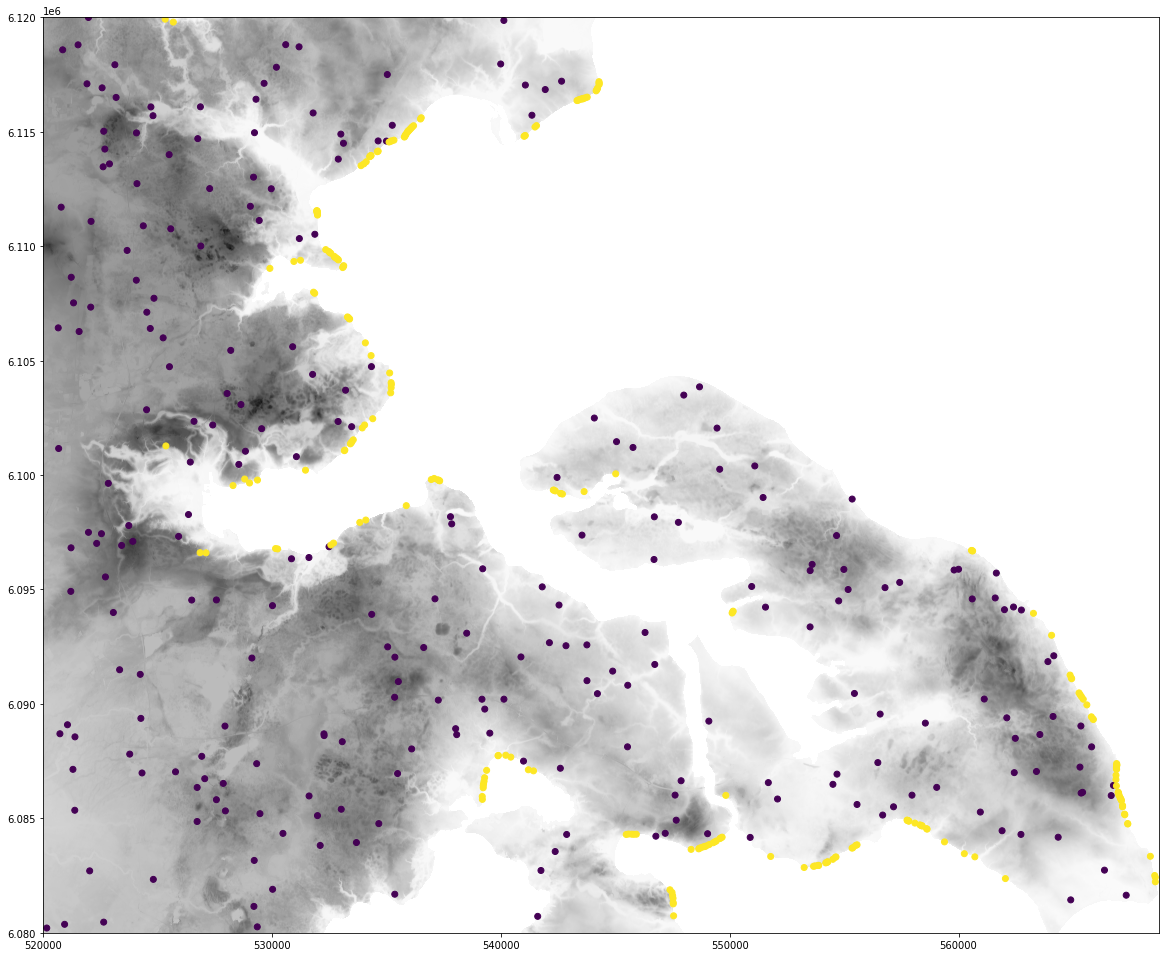

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))
stack.dem_elevation.plot(ax=ax, cmap='Greys')
training_pt.plot(column="class", ax=ax)
plt.show()

In [15]:
df_points = stack.extract_vector(training_pt)

In [16]:
df_points.head(5)

,,dem_elevation,TWI,TPI,TRI,SPI,easterness,northerness,profile_curvature,slope_std,distance_coast,distance_road,distance_streams,average_temp_ref,cloudburst_ref,groundwater_ref,rain_average_ref,rain_max_day_ref,soil,geomorphology,geometry
pixel_idx,geometry_idx,,,,,,,,,,,,,,,,,,,,
0,0,49.812370,3.850803,-0.003757,0.129422,-1.090042,0.996409,-0.084667,0.451036,0.260900,300.0,100.0,300.0,8.714708,0.344714,-1.862408,2.357941,36.355110,13.0,7.0,POINT (529480.168 6085204.717)
1,1,49.604942,6.220126,-0.015270,0.073316,0.114811,-0.840527,-0.541769,0.605593,0.098046,300.0,100.0,300.0,8.715714,0.345622,-2.198076,2.336368,35.777359,15.0,7.0,POINT (530028.828 6094293.069)
2,2,5.504304,7.293916,0.001757,0.025309,-1.001074,0.305586,0.952165,-0.426244,0.187640,300.0,100.0,170.0,8.960491,0.348792,-0.754028,1.935387,32.383217,15.0,7.0,POINT (558549.973 6089160.883)
3,3,14.678636,5.248747,0.082338,0.082340,-2.524909,0.167411,0.985887,-4.298136,1.015810,300.0,100.0,300.0,8.940946,0.340399,-0.766196,2.000846,32.761238,15.0,7.0,POINT (550963.738 6095130.297)
4,4,49.577496,5.482202,0.011391,0.023651,-2.771589,0.997049,0.076766,-0.701600,0.299227,300.0,100.0,300.0,8.512472,0.338073,-3.730066,2.325771,34.447304,13.0,1.0,POINT (521924.300 6117090.821)


In [17]:
df_points = df_points.merge(
    right=training_pt.loc[:, ["class"]],
    left_on="geometry_idx",
    right_on="index",
    right_index=True
)

In [18]:
df_points.head(5)

,,dem_elevation,TWI,TPI,TRI,SPI,easterness,northerness,profile_curvature,slope_std,distance_coast,...,distance_streams,average_temp_ref,cloudburst_ref,groundwater_ref,rain_average_ref,rain_max_day_ref,soil,geomorphology,geometry,class
pixel_idx,geometry_idx,,,,,,,,,,,,,,,,,,,,,
0,0,49.812370,3.850803,-0.003757,0.129422,-1.090042,0.996409,-0.084667,0.451036,0.260900,300.0,...,300.0,8.714708,0.344714,-1.862408,2.357941,36.355110,13.0,7.0,POINT (529480.168 6085204.717),0
1,1,49.604942,6.220126,-0.015270,0.073316,0.114811,-0.840527,-0.541769,0.605593,0.098046,300.0,...,300.0,8.715714,0.345622,-2.198076,2.336368,35.777359,15.0,7.0,POINT (530028.828 6094293.069),0
2,2,5.504304,7.293916,0.001757,0.025309,-1.001074,0.305586,0.952165,-0.426244,0.187640,300.0,...,170.0,8.960491,0.348792,-0.754028,1.935387,32.383217,15.0,7.0,POINT (558549.973 6089160.883),0
3,3,14.678636,5.248747,0.082338,0.082340,-2.524909,0.167411,0.985887,-4.298136,1.015810,300.0,...,300.0,8.940946,0.340399,-0.766196,2.000846,32.761238,15.0,7.0,POINT (550963.738 6095130.297),0
4,4,49.577496,5.482202,0.011391,0.023651,-2.771589,0.997049,0.076766,-0.701600,0.299227,300.0,...,300.0,8.512472,0.338073,-3.730066,2.325771,34.447304,13.0,1.0,POINT (521924.300 6117090.821),0


In [19]:
data= df_points.drop(columns=['geometry'])

In [20]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 516 entries, (0, 0) to (515, 515)
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dem_elevation      516 non-null    float32
 1   TWI                516 non-null    float32
 2   TPI                516 non-null    float32
 3   TRI                516 non-null    float32
 4   SPI                516 non-null    float32
 5   easterness         516 non-null    float32
 6   northerness        516 non-null    float32
 7   profile_curvature  516 non-null    float32
 8   slope_std          516 non-null    float32
 9   distance_coast     516 non-null    float32
 10  distance_road      516 non-null    float32
 11  distance_streams   516 non-null    float32
 12  average_temp_ref   516 non-null    float32
 13  cloudburst_ref     516 non-null    float32
 14  groundwater_ref    516 non-null    float32
 15  rain_average_ref   516 non-null    float32
 16  rain_m

In [22]:
data.dropna()

,,dem_elevation,TWI,TPI,TRI,SPI,easterness,northerness,profile_curvature,slope_std,distance_coast,distance_road,distance_streams,average_temp_ref,cloudburst_ref,groundwater_ref,rain_average_ref,rain_max_day_ref,soil,geomorphology,class
pixel_idx,geometry_idx,,,,,,,,,,,,,,,,,,,,
0,0,49.812370,3.850803,-0.003757,0.129422,-1.090042,0.996409,-0.084667,0.451036,0.260900,300.0,100.0,300.0,8.714708,0.344714,-1.862408,2.357941,36.355110,13.0,7.0,0
1,1,49.604942,6.220126,-0.015270,0.073316,0.114811,-0.840527,-0.541769,0.605593,0.098046,300.0,100.0,300.0,8.715714,0.345622,-2.198076,2.336368,35.777359,15.0,7.0,0
2,2,5.504304,7.293916,0.001757,0.025309,-1.001074,0.305586,0.952165,-0.426244,0.187640,300.0,100.0,170.0,8.960491,0.348792,-0.754028,1.935387,32.383217,15.0,7.0,0
3,3,14.678636,5.248747,0.082338,0.082340,-2.524909,0.167411,0.985887,-4.298136,1.015810,300.0,100.0,300.0,8.940946,0.340399,-0.766196,2.000846,32.761238,15.0,7.0,0
4,4,49.577496,5.482202,0.011391,0.023651,-2.771589,0.997049,0.076766,-0.701600,0.299227,300.0,100.0,300.0,8.512472,0.338073,-3.730066,2.325771,34.447304,13.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,511,4.340072,3.238309,0.328836,0.771113,1.729378,0.941228,0.337772,-21.278305,3.183933,13.0,100.0,300.0,8.953229,0.351037,-1.552176,1.905198,32.240685,13.0,7.0,1
512,512,5.383513,4.182936,-0.079369,0.398562,1.358135,0.945482,-0.325675,-2.876793,2.994544,15.0,100.0,300.0,8.955191,0.351063,-0.903337,1.905462,32.233025,15.0,7.0,1
513,513,4.851269,5.109480,-0.342115,0.839078,3.652501,0.816622,0.577173,4.131120,2.461991,17.0,100.0,300.0,8.955191,0.351063,-0.469643,1.905462,32.233025,15.0,7.0,1


In [23]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 516 entries, (0, 0) to (515, 515)
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dem_elevation      516 non-null    float32
 1   TWI                516 non-null    float32
 2   TPI                516 non-null    float32
 3   TRI                516 non-null    float32
 4   SPI                516 non-null    float32
 5   easterness         516 non-null    float32
 6   northerness        516 non-null    float32
 7   profile_curvature  516 non-null    float32
 8   slope_std          516 non-null    float32
 9   distance_coast     516 non-null    float32
 10  distance_road      516 non-null    float32
 11  distance_streams   516 non-null    float32
 12  average_temp_ref   516 non-null    float32
 13  cloudburst_ref     516 non-null    float32
 14  groundwater_ref    516 non-null    float32
 15  rain_average_ref   516 non-null    float32
 16  rain_m

In [25]:
data = data.dropna()
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 513 entries, (0, 0) to (515, 515)
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dem_elevation      513 non-null    float32
 1   TWI                513 non-null    float32
 2   TPI                513 non-null    float32
 3   TRI                513 non-null    float32
 4   SPI                513 non-null    float32
 5   easterness         513 non-null    float32
 6   northerness        513 non-null    float32
 7   profile_curvature  513 non-null    float32
 8   slope_std          513 non-null    float32
 9   distance_coast     513 non-null    float32
 10  distance_road      513 non-null    float32
 11  distance_streams   513 non-null    float32
 12  average_temp_ref   513 non-null    float32
 13  cloudburst_ref     513 non-null    float32
 14  groundwater_ref    513 non-null    float32
 15  rain_average_ref   513 non-null    float32
 16  rain_m

In [26]:
data.to_csv('external_validation.csv', index = False)